# Example of Fourier transform

### by Edward Jackson

### Based on code by Nikolay Manchev (under CCA 4.0 International license)

#### In this example, I recorded a chord on the piano (C4, G4, E5, C6). I processed the 'wav' file and ran it through a Fourier transform alogrithm to return the constituent notes. The explanations below show how successful (or not) the example was.

Importing libraries and sound file

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [2]:
!wget https://github.com/epjackson/testrepository/raw/master/Fourier.wav

--2020-09-05 09:43:12--  https://github.com/epjackson/testrepository/raw/master/Fourier.wav
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/epjackson/testrepository/master/Fourier.wav [following]
--2020-09-05 09:43:12--  https://raw.githubusercontent.com/epjackson/testrepository/master/Fourier.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.16.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.16.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 651112 (636K) [audio/wav]
Saving to: ‘Fourier.wav’

100%[======================================>] 651,112     --.-K/s   in 0.04s   

2020-09-05 09:43:13 (17.6 MB/s) - ‘Fourier.wav’ saved [651112/651112]



In [3]:
fs, snd = wavfile.read('Fourier.wav')

Defining scales and format for illustrative figure of sound wave

In [4]:
snd = snd / (2.**15)
s1 = snd[:,0]

In [5]:
plt.figure(figsize=(20,8))
plt.style.use("seaborn") ;

<Figure size 1440x576 with 0 Axes>

In [6]:
time = np.arange(0, s1.shape[0], 1)
time = (time / fs) * 1000

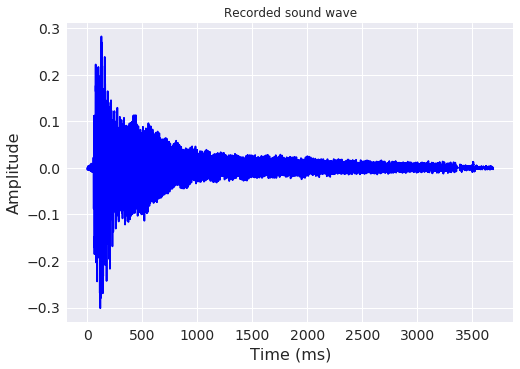

In [7]:
plt.plot(time, s1, color='b')
plt.title('Recorded sound wave')
plt.ylabel('Amplitude', fontsize=16)
plt.xlabel('Time (ms)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Import further libraries including Fourier Transform package

In [35]:
import math
from numpy.fft import fft

Setting up parameters for spectogram of chord showing individual frequencies including threshold to cut frequencies of other background noise.

In [36]:
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.style.use("seaborn")

In [37]:
threshold = 0 # threshold at 0 to show ALL frequency signals
fs, snd = wavfile.read('Fourier.wav')
y = snd[:,0]

In [38]:
plt.figure(figsize=(20,8))

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

Preparing Fourier transform algorithm

In [39]:
n = len(y)
p = fft(y)

In [40]:
mag = np.sqrt(p.real**2 + p.imag**2)
mag = mag * 2 / n
mag = mag[0:math.ceil((n)/2.0)]

In [41]:
freq = np.arange(0 ,len(mag), 1.0) * (fs / n)

In [42]:
# as threshold is set at zero, individual frequency signals will not be listed until later.
if threshold !=0:
    print(np.unique(np.rint(freq[np.in1d(mag, mag[mag>threshold])])))
    mag[mag<threshold]=threshold

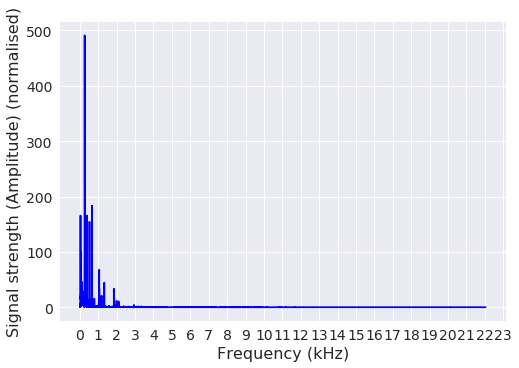

In [43]:
plt.plot(freq/1000, mag, color='b')
plt.xticks(np.arange(min(freq/1000), max(freq/1000)+1, 1.0))
plt.title='Spectogram showing the amplitude of individual frequencies in the recording'
plt.ylabel('Signal strength (Amplitude) (normalised)', fontsize=16)
plt.xlabel('Frequency (kHz)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
all = plt.show()
all

In [53]:
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.style.use("seaborn")

Constructing a new spectogram highlighting the strongest frequency signals in the recording.

In [84]:
threshold = 160 # threshold was changed several times to isolate significant individual frequencies
fs, snd = wavfile.read('Fourier.wav')
y = snd[:,0]

In [85]:
plt.figure(figsize=(20,8))

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

In [86]:
n = len(y)
p = fft(y)

In [87]:
mag = np.sqrt(p.real**2 + p.imag**2)
mag = mag * 2 / n
mag = mag[0:math.ceil((n)/2.0)]

In [88]:
freq = np.arange(0 ,len(mag), 1.0) * (fs / n)

In [89]:
if threshold !=0:
    print(np.unique(np.rint(freq[np.in1d(mag, mag[mag>threshold])])))
    mag[mag<threshold]=threshold

[ 35. 261. 262. 263. 392. 661.]


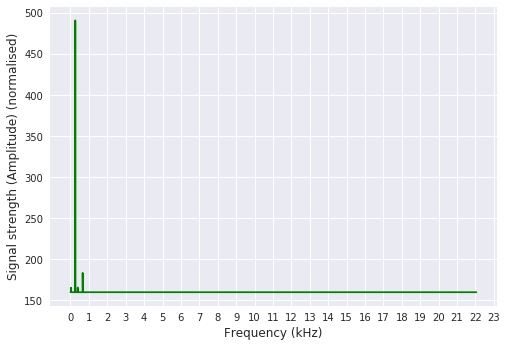

In [94]:
plt.plot(freq/1000, mag, color='g')
plt.xticks(np.arange(min(freq/1000), max(freq/1000)+1, 1.0))
plt.title='Spectogram showing the amplitude of individual frequencies in the recording'
plt.ylabel('Signal strength (Amplitude) (normalised)', fontsize=12)
plt.xlabel('Frequency (kHz)', fontsize=12)
strongest = plt.show()
strongest

We can see above the frequencies with the strongest signals.
Using a Wikipedia page showing the frequencies for every key on a piano, these frequencies mapped as follows:
- 261/262/263.... Middle C4 (261.6256 Hz)
- 392.... G4 (391.9954 Hz)
- 661/662.... E5 (659.2551 Hz)
The latter would indicate that the sound map for the piano's representation of E5 might be inaccurate OR the recording has caused some distortion.

The highest note in the chord of 4 notes has not been picked up in the recording:
- C6 (1046.502 Hz) - the amplitude is significantly below the threshold set.

The recording has also picked up a background sound at 35Hz. It actually represents a very low-pitch note for which there would be no key on some smaller keyboards.

**Improvements**
Requested forum help to magnify x-axis to show frequencies with strongest signal more clearly.
